In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
#Load the training dataset
train_data = pd.read_csv("training.csv")
print(train_data.head())

X_train = train_data[["GLCM_pan", "Mean_Green", "Mean_Red", "Mean_NIR"]]
y_train = train_data["SD_pan"]

#bulid model
regression_model_sd_pan = LinearRegression()
regression_model_sd_pan.fit(X_train, y_train)

#predict
y_pred_train_sd_pan = regression_model_sd_pan.predict(X_train)

#evaluate
mse_train_sd_pan = mean_squared_error(y_train, y_pred_train_sd_pan)
print(f"Mean Squared Error on Training Data for SD_pan: {mse_train_sd_pan}")

  class    GLCM_pan  Mean_Green    Mean_Red    Mean_NIR     SD_pan
0     w  120.362774  205.500000  119.395349  416.581395  20.676318
1     w  124.739583  202.800000  115.333333  354.333333  16.707151
2     w  134.691964  199.285714  116.857143  477.857143  22.496712
3     w  127.946309  178.368421   92.368421  278.473684  14.977453
4     w  135.431548  197.000000  112.690476  532.952381  17.604193
Mean Squared Error on Training Data for SD_pan: 112.0364472324162


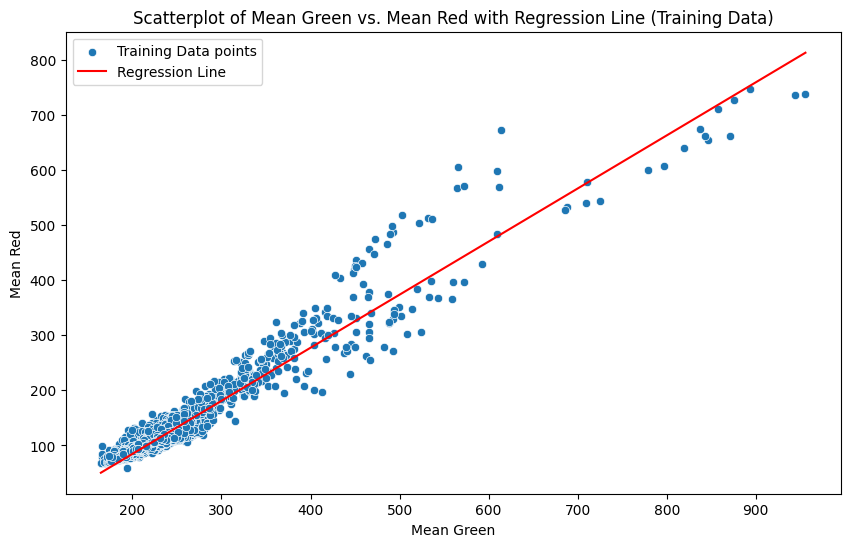

In [18]:
X_mean_green = train_data[["Mean_Green"]].values
y_mean_red = train_data["Mean_Red"]

#Bulid model
regression_model_mean_red = LinearRegression()
regression_model_mean_red.fit(X_mean_green, y_mean_red)

#Predict
y_pred_mean_red = regression_model_mean_red.predict(X_mean_green)

#Creat a plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Mean_Green", y="Mean_Red", data=train_data, label="Training Data points")
sns.lineplot(x=train_data["Mean_Green"], y=y_pred_mean_red, color='red', label="Regression Line")
plt.xlabel("Mean Green")
plt.ylabel("Mean Red")
plt.title("Scatterplot of Mean Green vs. Mean Red with Regression Line (Training Data)")
plt.legend()
plt.show()


   time_invest  passed
0           24       1
1           23       1
2           30       1
3           22       0
4           13       0


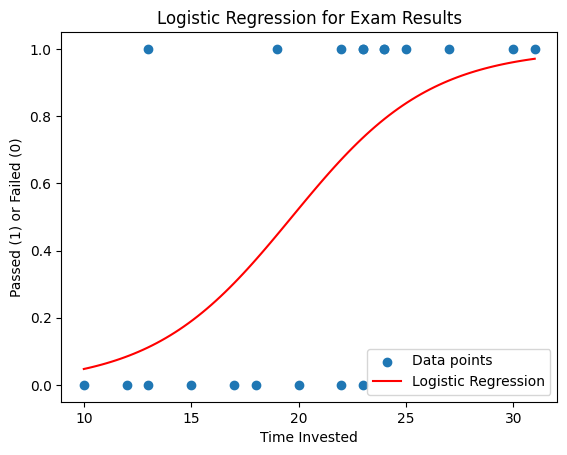

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("examresults.csv",delimiter=";")
print(df.head())

X = df[['time_invest']]
y = df['passed']

logreg_model = LogisticRegression()
logreg_model.fit(X, y)

X_values = np.linspace(X.min(), X.max(), 100)
y_values = 1 / (1 + np.exp(-logreg_model.coef_[0][0] * X_values - logreg_model.intercept_[0]))

plt.scatter(X, y, label='Data points')
plt.plot(X_values, y_values, color='red', label='Logistic Regression')
plt.xlabel('Time Invested')
plt.ylabel('Passed (1) or Failed (0)')
plt.title('Logistic Regression for Exam Results')
plt.legend()
plt.show()

In [27]:
#The chance of passing the exam for different time investments
def calculate_pass_probability(hours):
    probability = 1 / (1 + np.exp(-logreg_model.coef_[0][0] * hours - logreg_model.intercept_[0]))
    return probability

#The chance of passing with 1 hour of work
chance_1_hour = calculate_pass_probability(1)
print(f"Chance of passing with 1 hour of work: {chance_1_hour}")

Chance of passing with 1 hour of work: 0.003057212436742554


In [28]:
#The chance of passing for all hours larger than 10
for hours in range(11, 32):
    chance = calculate_pass_probability(hours)
    print(f"Chance of passing with {hours} hours of work: {chance}")

Chance of passing with 11 hours of work: 0.06351294371964826
Chance of passing with 12 hours of work: 0.08461275352747598
Chance of passing with 13 hours of work: 0.11188472959215202
Chance of passing with 14 hours of work: 0.14653970379664305
Chance of passing with 15 hours of work: 0.1896366541464772
Chance of passing with 16 hours of work: 0.2418170915704658
Chance of passing with 17 hours of work: 0.30298719195954116
Chance of passing with 18 hours of work: 0.37203804443872124
Chance of passing with 19 hours of work: 0.44673940829401637
Chance of passing with 20 hours of work: 0.5239257408229535
Chance of passing with 21 hours of work: 0.5999857892423217
Chance of passing with 22 hours of work: 0.6715129056534344
Chance of passing with 23 hours of work: 0.7358803800072985
Chance of passing with 24 hours of work: 0.7915502334762307
Chance of passing with 25 hours of work: 0.8380683118448741
Chance of passing with 26 hours of work: 0.8758337432209907
Chance of passing with 27 hours o